In [1]:
import os
os.chdir('..')

In [2]:
import numpy as np
import scipy as sp
import datajoint as dj
import matplotlib.pyplot as plt

In [3]:
from pipeline import lab, experiment, tracking, ephys, psth
from pipeline import plot
from pipeline.plot import behavior_plot, unit_characteristic_plot

Connecting root@127.0.0.1:3306


# Top level ***ephys*** diagram

In [ ]:
ephys_erd = ((dj.ERD(ephys.Unit)-2) + dj.ERD(ephys.TrialSpikes)
             + (dj.ERD(experiment.BrainLocation)-1)
             + dj.ERD(ephys.ProbeInsertion.InsertionLocation)
             + dj.ERD(psth.UnitSelectivity) + (dj.ERD(psth.PeriodSelectivity) - 1))

In [ ]:
ephys_erd

# Top level ***behavior*** diagram

In [ ]:
behav_erd = (dj.ERD(experiment.SessionTrial) - 1 
             + (dj.ERD(experiment.BrainLocation)-1) 
             + (dj.ERD(experiment.BehaviorTrial) + 1 - 1) 
             + (dj.ERD(experiment.PhotostimTrial) + 1 - 1)) 

In [ ]:
behav_erd

# Browsing of subjects

In [ ]:
lab.Subject()

### Query one subject

In [ ]:
# restrict by string
lab.Subject & 'subject_id=353936'

In [ ]:
# restrict by dictionary
lab.Subject & {'subject_id': 397853}

In [ ]:
lab.Subject & {'sex': 'm'}

### Fetch back the subject key

In [ ]:
subj_397853 = (lab.Subject & {'subject_id': 397853}).fetch1('KEY')  # "fetch1()" because we know there's only one

In [ ]:
subj_397853

In [ ]:
male_subjs = (lab.Subject & {'sex': 'm'}).fetch('KEY')  # "fetch()" for fetching multiple

In [ ]:
male_subjs

# Browsing of sessions

In [4]:
# Get sessions with units
sessions = experiment.Session & ephys.Unit
sessions

subject_id institution 6 digit animal ID,session session number,session_date,username,rig
435884,1,2018-12-07,daveliu,RRig


In [5]:
# List all sessions and the ProbeInsertion counts for each
sessions = sessions.aggr(ephys.ProbeInsertion, probe_insert_count='count(*)')
sessions

subject_id institution 6 digit animal ID,session session number,probe_insert_count calculated attribute
435884,1,1


In [ ]:
# query 1 session
experiment.Session & {'session': 15, 'subject_id': 412330}

In [7]:
# get session key
session_key = (experiment.Session & {'session': 1, 'subject_id': 435884}).fetch1('KEY')

# Browsing of units for this session
#### Keep in mind that units may come from different ***ProbeInsertion***

In [8]:
unit_erd = (dj.ERD(ephys.Unit) - 1) + (dj.ERD(ephys.Unit) + 1)

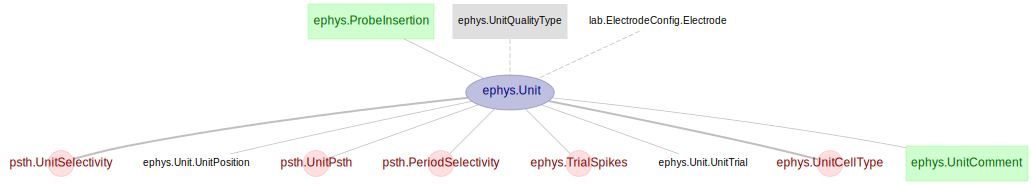

In [9]:
unit_erd

In [10]:
ephys.Unit & session_key

subject_id institution 6 digit animal ID,session session number,insertion_number,unit,unit_uid unique across sessions/animals,unit_quality,probe unique identifier for this model of probe (e.g. part number),electrode_config_id hash of the group and group_member (ensure uniqueness),electrode_group electrode group,electrode electrode,unit_posx (um) x position of the unit on the probe,unit_posy (um) y position of the unit on the probe,spike_times (s),unit_amp,unit_snr,waveform average spike waveform
435884,1,1,1,1,good,15131808323,18fd56922c9f76773ad5ad288619ab51,0,6,42.4544792175293,33.699256896972656,=BLOB=,294.20157,13.780584,=BLOB=
435884,1,1,2,2,all,15131808323,18fd56922c9f76773ad5ad288619ab51,0,4,29.585512161254883,14.670790672302246,=BLOB=,344.143,16.491089,=BLOB=
435884,1,1,3,3,all,15131808323,18fd56922c9f76773ad5ad288619ab51,0,5,16.062057495117188,38.767662048339844,=BLOB=,287.36014,10.473887,=BLOB=
435884,1,1,4,4,all,15131808323,18fd56922c9f76773ad5ad288619ab51,0,5,15.020341873168945,43.26382827758789,=BLOB=,154.78827,7.615032,=BLOB=
435884,1,1,5,5,good,15131808323,18fd56922c9f76773ad5ad288619ab51,0,5,14.338550567626953,38.978546142578125,=BLOB=,157.83987,7.869556,=BLOB=
435884,1,1,6,6,all,15131808323,18fd56922c9f76773ad5ad288619ab51,0,6,40.072269439697266,45.23943328857422,=BLOB=,161.41177,7.1355534,=BLOB=
435884,1,1,7,7,all,15131808323,18fd56922c9f76773ad5ad288619ab51,0,7,1.4678318500518799,61.98297882080078,=BLOB=,215.175,12.520164,=BLOB=


In [11]:
good_units = ephys.Unit & session_key & {'unit_quality': 'good'}
good_units

subject_id institution 6 digit animal ID,session session number,insertion_number,unit,unit_uid unique across sessions/animals,unit_quality,probe unique identifier for this model of probe (e.g. part number),electrode_config_id hash of the group and group_member (ensure uniqueness),electrode_group electrode group,electrode electrode,unit_posx (um) x position of the unit on the probe,unit_posy (um) y position of the unit on the probe,spike_times (s),unit_amp,unit_snr,waveform average spike waveform
435884,1,1,1,1,good,15131808323,18fd56922c9f76773ad5ad288619ab51,0,6,42.4544792175293,33.699256896972656,=BLOB=,294.20157,13.780584,=BLOB=
435884,1,1,5,5,good,15131808323,18fd56922c9f76773ad5ad288619ab51,0,5,14.338550567626953,38.978546142578125,=BLOB=,157.83987,7.869556,=BLOB=
435884,1,1,10,10,good,15131808323,18fd56922c9f76773ad5ad288619ab51,0,10,44.27643966674805,79.20182800292969,=BLOB=,275.46558,13.48085,=BLOB=
435884,1,1,11,11,good,15131808323,18fd56922c9f76773ad5ad288619ab51,0,10,45.542633056640625,80.29844665527344,=BLOB=,117.8578,6.137078,=BLOB=
435884,1,1,15,15,good,15131808323,18fd56922c9f76773ad5ad288619ab51,0,12,31.08588409423828,98.89152526855469,=BLOB=,242.60864,14.416281,=BLOB=
435884,1,1,18,18,good,15131808323,18fd56922c9f76773ad5ad288619ab51,0,18,45.05342483520508,159.88873291015625,=BLOB=,142.01253,8.705505,=BLOB=
435884,1,1,21,21,good,15131808323,18fd56922c9f76773ad5ad288619ab51,0,22,46.288734436035156,199.1356201171875,=BLOB=,411.5883,19.068323,=BLOB=


## Unit selectivity

In [12]:
psth.UnitSelectivity & good_units

subject_id institution 6 digit animal ID,session session number,insertion_number,unit,unit_selectivity
435884,1,1,5,ipsi-selective
435884,1,1,10,contra-selective
435884,1,1,11,ipsi-selective
435884,1,1,18,ipsi-selective
435884,1,1,21,ipsi-selective
435884,1,1,26,ipsi-selective
435884,1,1,27,contra-selective


### Pick one unit

In [13]:
unit_key = (psth.UnitSelectivity & good_units & 'unit=5').fetch1('KEY')
unit_key                                                                 

{'subject_id': 435884, 'session': 1, 'insertion_number': 1, 'unit': 5}

### Unit PSTH

In [14]:
upsth_erd = (dj.ERD(psth.UnitPsth) - 1)

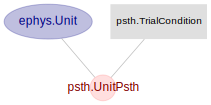

In [15]:
upsth_erd

In [16]:
psth.TrialCondition()

trial_condition_id hash of trial_condition_arg,trial_condition_desc trial condition description,trial_condition_func trial retrieval function,trial_condition_arg trial retrieval arguments
2d893587b6112ca356ce8a945abbcacb,all_noearlylick_both_alm_stim,_get_trials_include_stim,=BLOB=
42bb9a19b2b308454762247e4c3bd863,good_noearlylick_hit,_get_trials_exclude_stim,=BLOB=
90a437e5aa48baa8b16920c6ee0d67a6,good_noearlylick_left_miss,_get_trials_exclude_stim,=BLOB=
ace70cc388c9413d9b0541c512bdaf03,good_noearlylick_right_hit,_get_trials_exclude_stim,=BLOB=
afa05676a85b4827117ef2012d096b78,good_noearlylick_right_miss,_get_trials_exclude_stim,=BLOB=
c36c9b367f738156aa023abd98e44271,all_noearlylick_both_alm_nostim_right,_get_trials_exclude_stim,=BLOB=
c97ecd16d4db88d1a3a1b44b80341ff3,good_noearlylick_left_hit,_get_trials_exclude_stim,=BLOB=


In [17]:
unit_psth = psth.UnitPsth * psth.TrialCondition & unit_key & 'trial_condition_desc = "good_noearlylick_right_hit"'

In [18]:
psth, edges = unit_psth.fetch1('unit_psth')

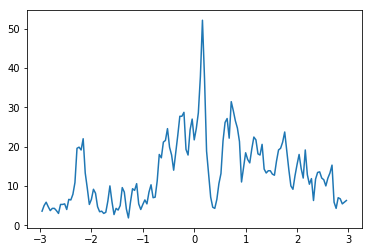

In [19]:
plt.plot(edges[1:], psth)

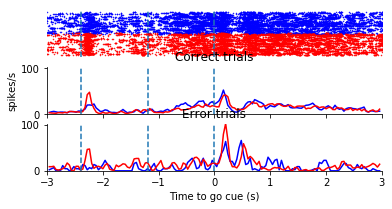

In [20]:
plot.unit_psth(unit_key)

# ================================================

In [ ]:
session_key={'session_id': 15, 'subject_id': 412330, 'unit_quality': 'good'}
period_selectivity_key_source = experiment.Period * ephys.Unit & session_key

In [ ]:
experiment.BrainLocation()

In [ ]:
ephys.ProbeInsertion()

In [ ]:
probe_insertions = {'session_id': 15, 'subject_id': 412330, 'insertion_number': 1}

In [ ]:
probe_insertions = {'session_id': 15, 'subject_id': 412330, 'insertion_number': 1}
ephys.ProbeInsertion.InsertionLocation.insert1({**probe_insertions, 'brain_location_name': 'right_alm'})
probe_insertions = {'session_id': 15, 'subject_id': 412330, 'insertion_number': 2}
ephys.ProbeInsertion.InsertionLocation.insert1({**probe_insertions, 'brain_location_name': 'right_medulla'})

In [ ]:
probe_insertions = {'session_id': 15, 'subject_id': 412330, 'insertion_number': 2}
ephys.ProbeInsertion.InsertionLocation({**probe_insertions, 'brain_location_name': 'right_medulla'})

In [ ]:
ephys.ProbeInsertion.InsertionLocation.heading

In [ ]:
experiment.Session.heading

In [ ]:
insertion_key2 = (ephys.ProbeInsertion & {'session_id': 15, 'subject_id': 412330}).fetch('KEY')[1]

In [ ]:
ephys.ProbeInsertion()